# Business Case: Walmart - Confidence Interval and CLT

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


# Problem Statement
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million arefemale).

**Link to the dataset** - https://drive.google.com/file/d/13T0cdKR3HHp8VmUG_UcdEC-Co4gfsCn9/view?usp=sharing
(https://drive.google.com/file/d/13T0cdKR3HHp8VmUG_UcdEC-Co4gfsCn9/view?usp=sharing)

**Understanding the Dataset**
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

* User_ID: User ID

* Product_ID: Product ID

* Gender: Sex of User

* Age: Age in bins

* Occupation: Occupation(Masked)

* City_Category: Category of the City (A,B,C)

* StayInCurrentCityYears: Number of years stay in current city

* Marital_Status: Marital Status

* ProductCategory: Product Category (Masked)

* Purchase: Purchase Amount

* Importing the Necessary Libraries



# Importing Required Libraries

In [1]:
# Importing libraries -
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.simplefilter('ignore')
!gdown 13T0cdKR3HHp8VmUG_UcdEC-Co4gfsCn9

In [2]:
df = pd.read_csv("walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Basic description of the dataset
- Analysis of basic metrics
- Observations on shape of data
- Conversion to categorical data type
- Statistical summary

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
# Shape of the dataset -
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [5]:
# Checking the datatype -
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
# Number of unique values in each column -
for i in df.columns:
    print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


* From above observation, we can conclude that only `Purchase` can be considered as `Countinous`, the rest of the columns though integers/float should be considered as `catgeories`.

In [7]:
#Changing the data type of columns with 'object' data type to 'category', since it can do memory optimization 
# Since all the columns except purchase column are used in a categorical manner in this dataset, we should convert into Catgeory
columns = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for i in  columns:
    df = df.astype({i:'category'})


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


## Missing values and Outlier detection


In [9]:
# Checking for null values -
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

* There aren't missing values in the data set

In [10]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [11]:
# replacing the values in marital_status column -

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].value_counts()

Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64

In [12]:
# count the number of married and unmarried people with respective age -
df.groupby(['Age','Marital_Status'])['User_ID'].count()

Age    Marital_Status
0-17   Unmarried          15102
       Married                0
18-25  Unmarried          78544
       Married            21116
26-35  Unmarried         133296
       Married            86291
36-45  Unmarried          66377
       Married            43636
46-50  Unmarried          12690
       Married            33011
51-55  Unmarried          10839
       Married            27662
55+    Unmarried           7883
       Married            13621
Name: User_ID, dtype: int64

* The data explains like this - within the age range of 17 nobody is married, and within 18-25 many people get married, with more married than unmarried. In all the further age bins, there are more married people than unmarried, except in the bin of 36-45, which probably could be because people are getting divorced in that age range.


In [13]:
df.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [14]:
# statistical summary of the numerical variables - here only Purchase column -
df.describe() 

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**Insights**
* The dataset contains 550068 rows and 10 columns of data. (Approximate 5 million, and assumption is that Walmart has 100 million customers)
* Each row gives information of a particular user (User ID), particular product (Product ID), and associated data for user and product.
* For a particular user, the associated data is - Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years and Marital_Status.
* For a particular product, the associated data is Product_Category and Purchase amount.
* The parameters User_ID, Occupation, Marital_Status, Product_Category and Purchase have categorical data.
* The parameters Product_ID, Gender, Age, City_Category and Stay_In_Current_City_Years have numerical data.
* There are no null values in the dataset.
* There are 550068 rows of data but data of only 5891 unique users buying 3631 unique products, so there must be lot of combinations of the two parameters.

* The age of customers is divided into 7 unequal bins
* Gender is either Male or Female, with more Male customers than Female.
* There are 21 different occupation types of users, and the period of stay of users in current city is either 0-4 years, or it can be more than 4 years.
* There are 20 different product categories
* Marital Status of customers is either Unmarried or Married, with more Unmarried's than Married's. This could mean there are more unmarried users than married

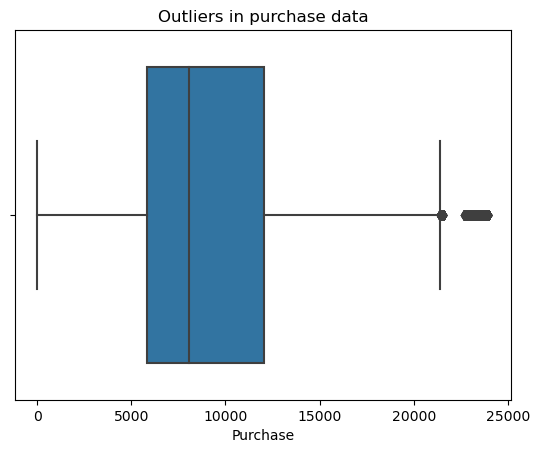

In [15]:
# Using boxplots to detect outliers in Purchase data -

plt.title("Outliers in purchase data")
sns.boxplot(data=df, x="Purchase")
plt.show()


Q1: 5823.0
Median: 8047.0
Mean: 9263.968712959126
Q3: 12054.0
Inter Quartile Range: 6231.0
Lower Outlier Bound: -3523.5
Upper Outlier Bound: 21400.5

Percentage of outliers: 0.49 %
There are 2677 outlier values, on the right hand side of the distribution, corresponding to 0.49% of all values.
There are 0 outlier values, on the right hand side of the distribution, corresponding to 0.49% of all values.


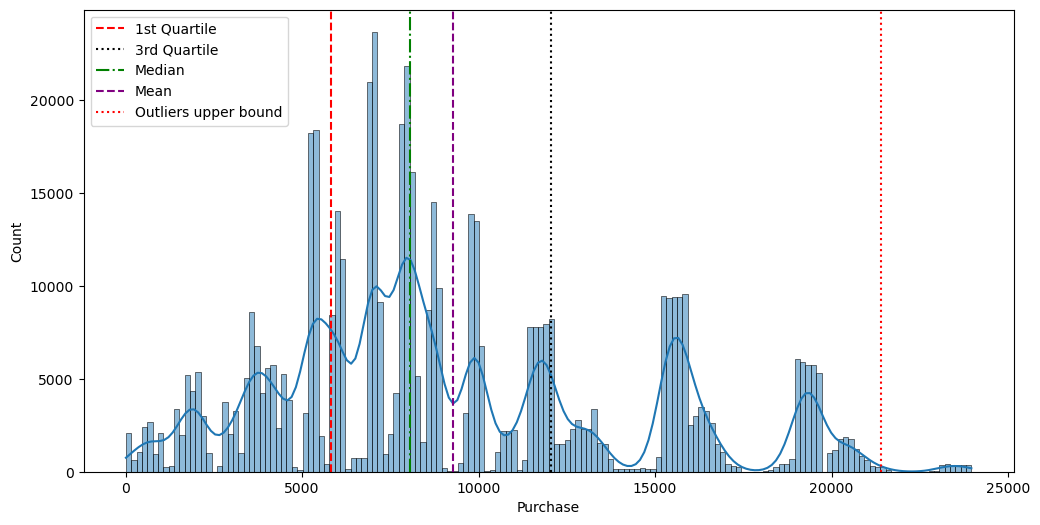

In [16]:
# Plotting the continuous column purchase -

data = df['Purchase']

# 1st and 3rd Quartiles
Q1 = data.quantile(0.25)
Q2=data.quantile(0.5)
mean=data.mean()
Q3 = data.quantile(0.75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# Lower and Upper Outlier Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Median: {Q2}")
print(f"Mean: {mean}")
print(f"Q3: {Q3}")
print(f"Inter Quartile Range: {IQR}")
print(f"Lower Outlier Bound: {lower_bound}")
print(f"Upper Outlier Bound: {upper_bound}", end="\n\n")
percentage = round((len(df.loc[(df['Purchase']>upper_bound) | (df['Purchase']<lower_bound)])/len(df)*100),2)
print(f"Percentage of outliers: {percentage} %")
print(f"There are {len(df.loc[df['Purchase']>upper_bound])} outlier values, on the right hand side of the distribution, corresponding to {percentage}% of all values.")
print(f"There are {len(df.loc[df['Purchase']<lower_bound])} outlier values, on the right hand side of the distribution, corresponding to {percentage}% of all values.")

plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Purchase',kde=True)
plt.axvline(Q1,color='red',linestyle='--',label="1st Quartile")
plt.axvline(Q3,color='black',linestyle=':',label="3rd Quartile")
plt.axvline(Q2,color='green',linestyle='-.',label="Median")
plt.axvline(mean,color='purple',linestyle="--",label="Mean")
plt.axvline(upper_bound,color='red',linestyle=":",label="Outliers upper bound")
plt.legend()
plt.show()


* Because of these outliers, the distribution is positively skewed, and therefore the mean is pulled towards the right of median.(Mean, 9264 is greater than Median, 8047)
* Although there are 2677 outlier values, they do not seem to be anomalies, hence they need not be treated in any way.


# Univariate Analysis

## Distribution of Gender, Martial status and City Category  among Walmart customers

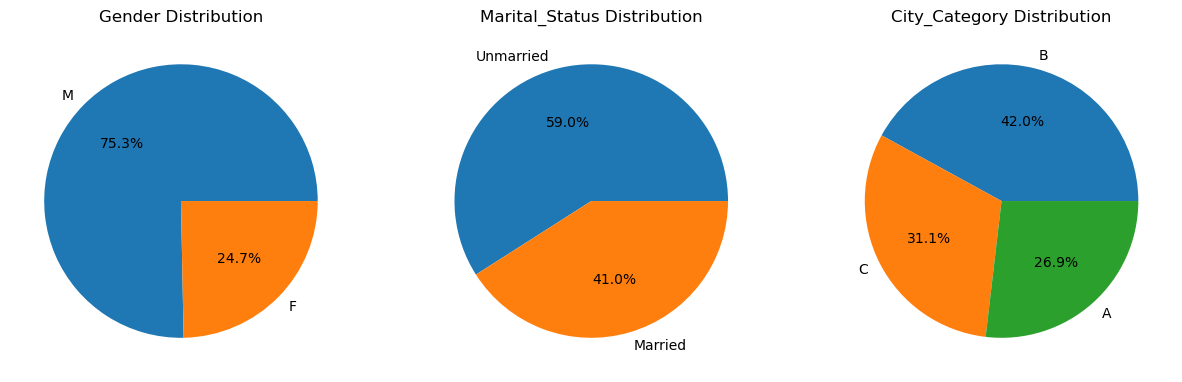

In [17]:
# Columns for which you want to create pie charts -

columns = ['Gender', 'Marital_Status', 'City_Category']
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns,1):
    plt.subplot(1, 3, i)
    column_counts = df[column].value_counts()
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%')
    plt.title(f'{column} Distribution')
plt.show()

**Insight:**
* **Gender** -  At Walmart, 75.3% of transactions are attributed to male customers, while 24.7% of transactions are attributed to female customers.
* **Martial Status** - Out of the total transactions, 59% are carried out by unmarried customers, while the remaining 41% are attributed to married customers.
* **City Category** - City B saw the most number of transactions followed by City C and City A respectively

**Recommendations:**
* For Black Friday sales, make sure the store provides a wide selection of products that align with the preferences and requirements of female customers. This might encompass a diverse range, spanning from clothing and beauty products to household essentials and beyond.
* Actively seek feedback from female customers to understand their preferences, concerns, and suggestions. Use this feedback to make improvements and adjustments that cater to their needs.
* Craft special bundles of essential household items for Black Friday sales, presenting family-focused discounts. This initiative aims to deliver both convenience and cost savings for married customers and their families during this event.

## Distribution of Age-group across the Walmart customers

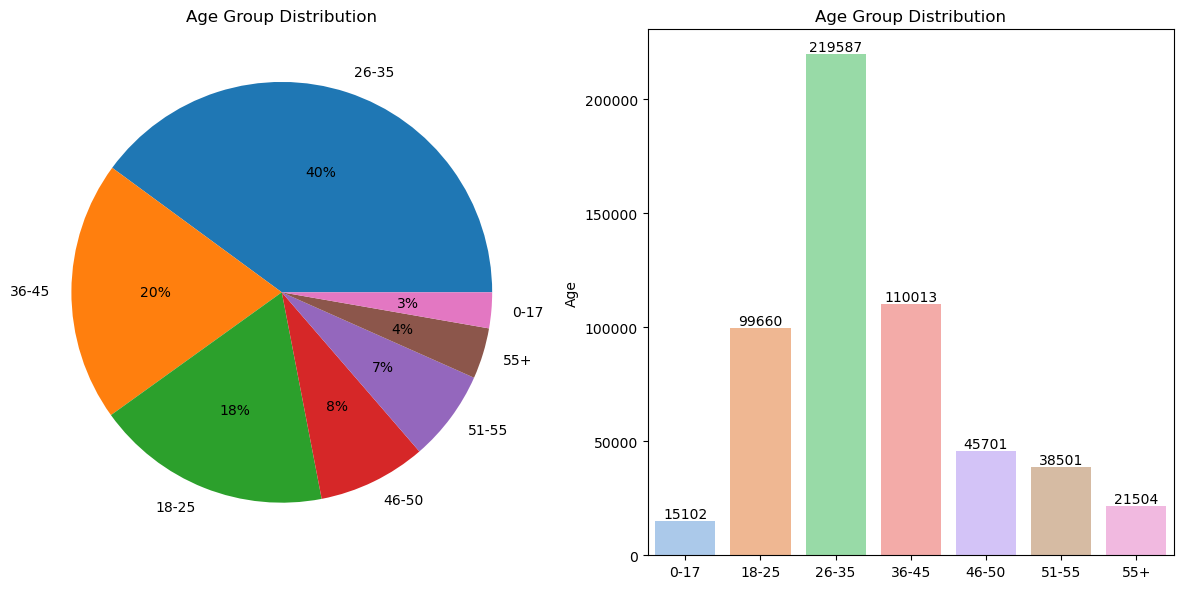

In [18]:
# Data -

Age_Group_counts = df['Age'].value_counts()

# Pie chart -
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(Age_Group_counts, labels=Age_Group_counts.index, autopct='%.0f%%')
plt.title('Age Group Distribution')

# Bar chart -
plt.subplot(1, 2, 2)
label = sns.barplot(x=Age_Group_counts.index, y=Age_Group_counts, palette='pastel')
for i in label.containers:
    label.bar_label(i)
plt.title('Age Group Distribution')
plt.tight_layout()
plt.show()


**Insight:**

* Approximately 86% of transactions are attributed to the age group 18-50, while those aged above 50 account for 11%. The youngest group (0-17 years) constitutes 2.75% of the total transactions.

**Recommendations:**

* Designate safe and fun play areas within the store where children can engage in age-appropriate activities. This can provide parents with a convenient shopping experience while keeping kids entertained.
* Create dedicated zones with comfortable seating and Wi-Fi for teenagers. This can become a place where they can socialize, study, or relax while their parents shop.

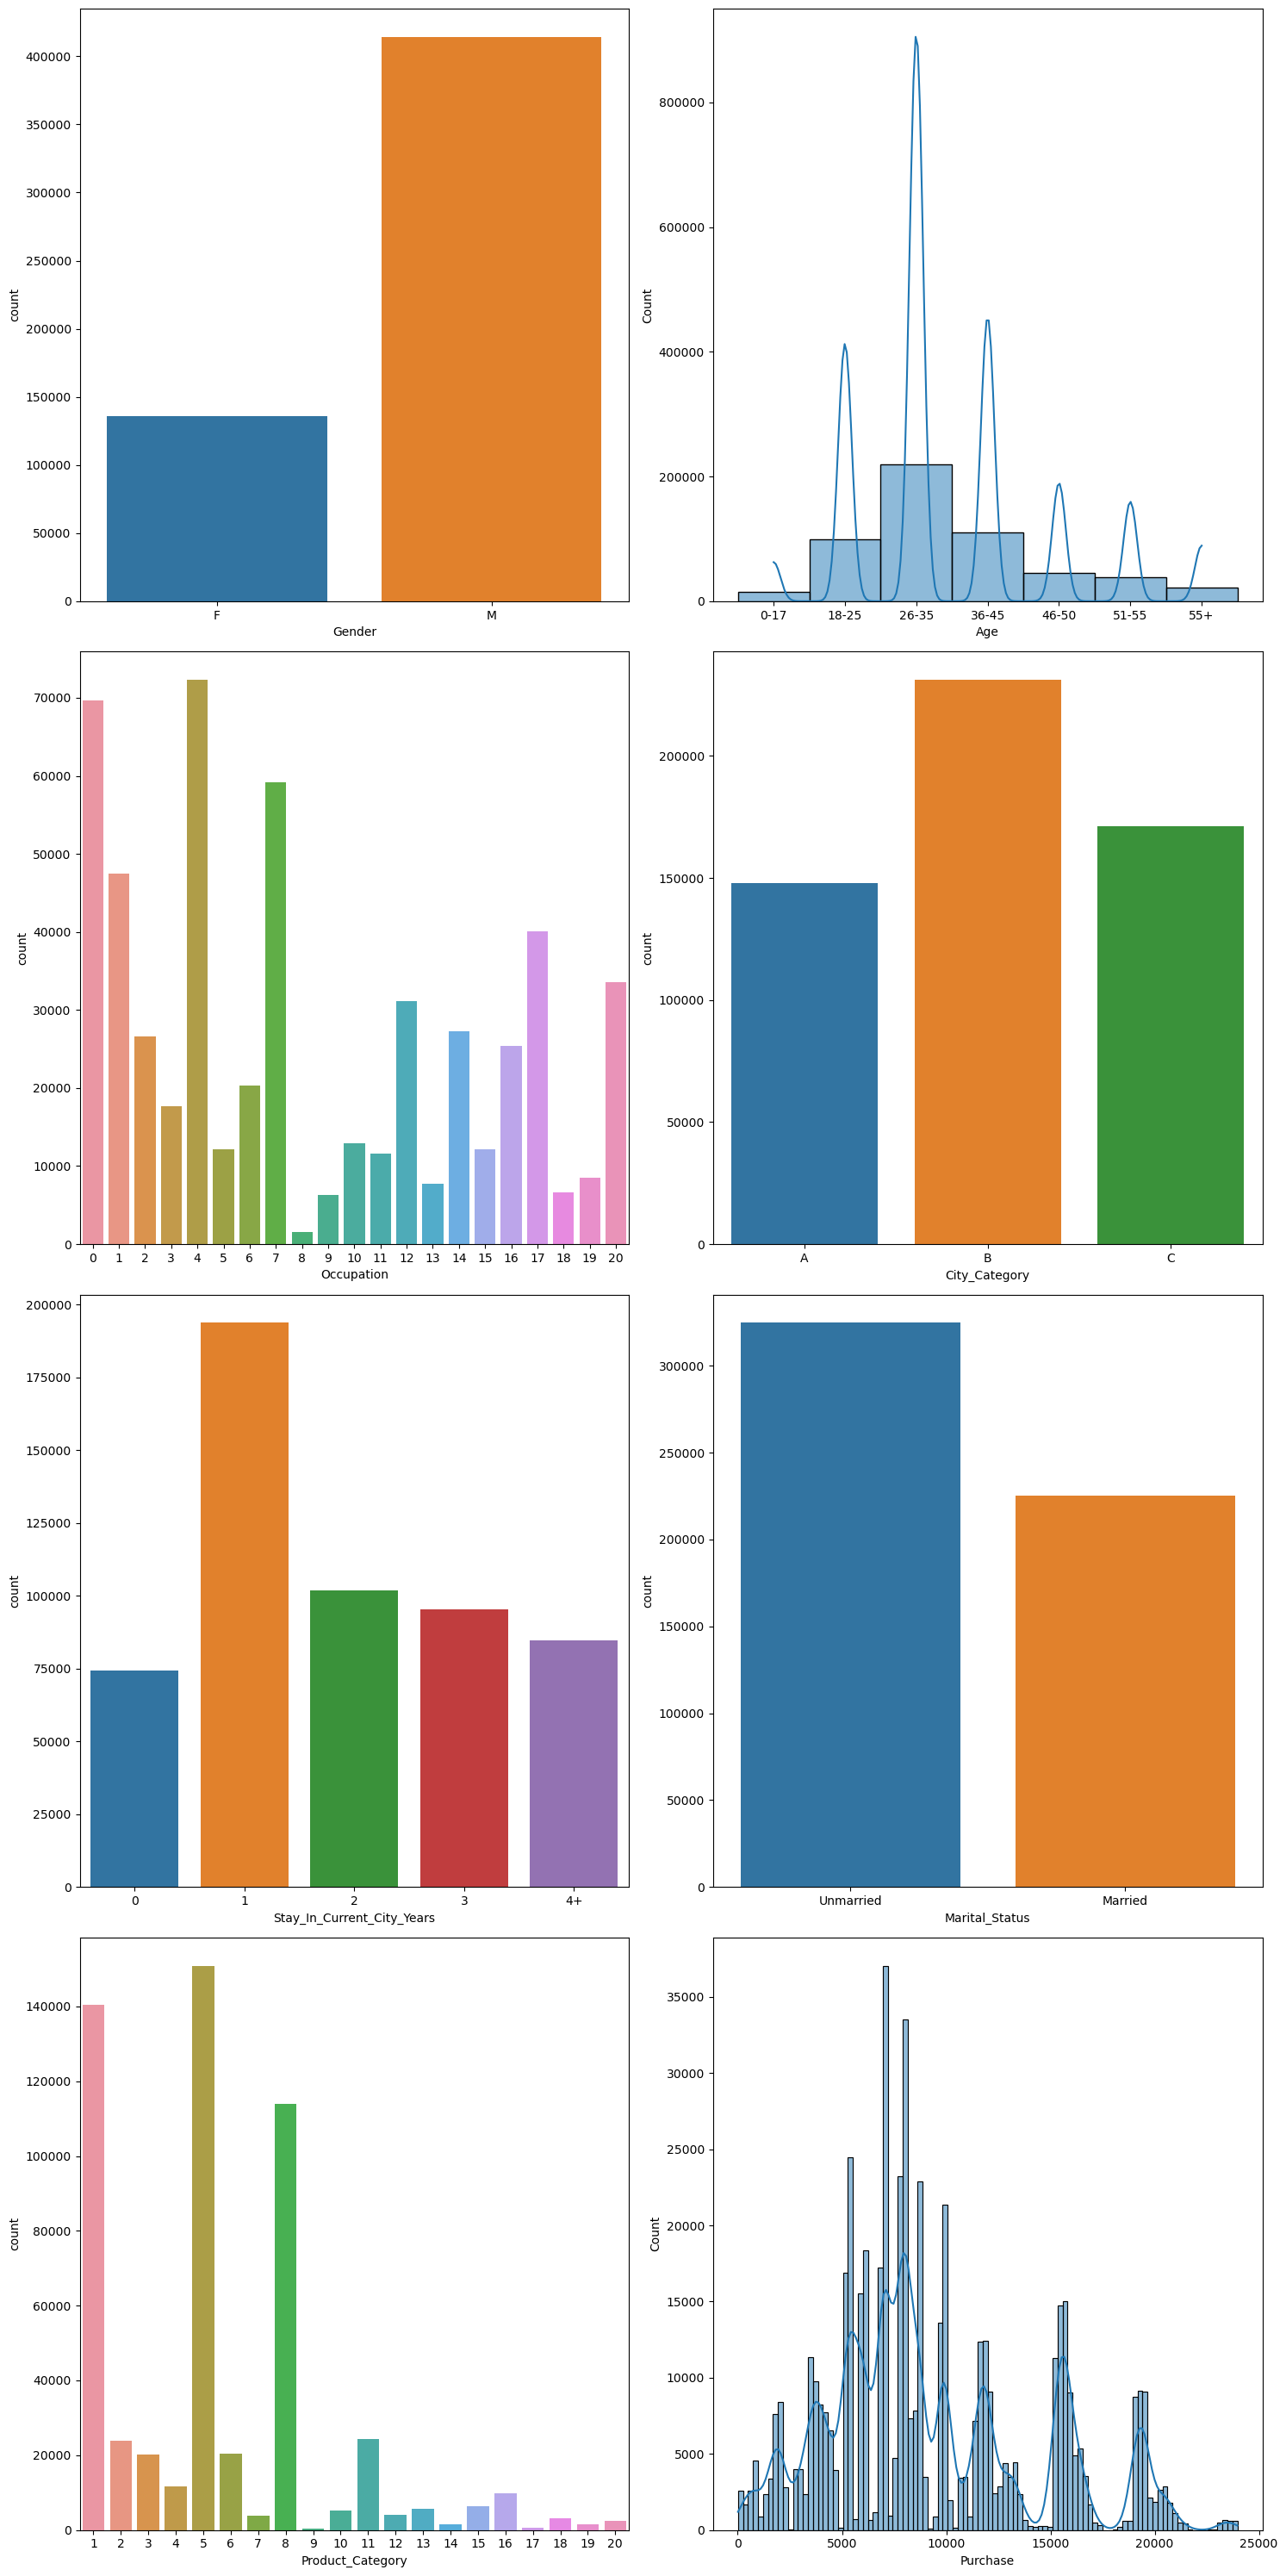

In [19]:
# Comparing count and histplot Across Different Categories -

fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 30))
fig.subplots_adjust(right=2, top=1.1)

sns.countplot(data=df, x='Gender', ax=axis[0,0])

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,1])

sns.countplot(data=df, x='Occupation', ax=axis[1,0])

sns.countplot(data=df, x='City_Category', ax=axis[1,1])

sns.countplot(data=df, x="Stay_In_Current_City_Years", ax=axis[2,0])

sns.countplot(data=df, x="Marital_Status", ax=axis[2,1])

sns.countplot(data=df, x="Product_Category", ax=axis[3,0])

sns.histplot(data=df, x="Purchase", bins=100, kde=True, ax=axis[3,1])

plt.tight_layout()  # Adjusts the layout to prevent overlapping
plt.show()


**Insights**

Here are the insights from the univariate analyses of the dataset:

* **Number of Unique Users:** There are a total of 5,891 unique users in the dataset. This information is important for understanding the dataset's scale and potential customer base.
* **Unique Products:** There are 3,631 unique products in the dataset. Among these products, "P00265242" appears to be the most frequently purchased, suggesting it might be a popular or essential item.
* **Gender Distribution:** The dataset has a significant gender imbalance, with 75% of users being male and only 25% being female. This information is crucial for gender-specific marketing strategies.
* **Age Distribution:** The largest age group among users falls within the range of 26-35 years, making up almost 40% of the dataset. The second-largest group is aged 36-45, accounting for almost 20% of the dataset. These age groups represent the majority of customers.
* **Occupation Distribution:** Users with occupation IDs 4 and 0 are the most prevalent in the dataset. This information can be useful for targeting specific occupation groups with tailored marketing campaigns or product recommendations.

* **City Distribution:** Most users are from city B, followed by city C and then city A. Understanding the geographic distribution of customers can help in store location planning and regional marketing strategies.
* **Duration of Stay in Current City:** The majority of users (35%) have lived in their current city for 1 year. This information can be used to tailor marketing messages based on the length of residence.
* **Marital Status:** 59% of users in the dataset are Single. This demographic information can inform product recommendations and promotions targeted at unmarried individuals.
* **Product Category Purchases:** Product category 5 is the most purchased, representing 27% of all purchases. This suggests that category 5 products are popular among customers. Understanding the popularity of product categories can guide inventory and marketing decisions.
* **Average Amount Spent:** The average amount spent by users is 9,263 dollars, with a minimum of 12 and a maximum of 23,961. This information provides insights into the spending behavior of customers and can be used to set pricing strategies and sales targets.

These insights provide a foundational understanding of the dataset and can be used to develop data-driven marketing and business strategies to better serve and engage with customers.


## Bivariate Analysis

In [20]:
# Comparing count, mean,std, min, max, median, 25th percentile, 75th percentile - 

from IPython.display import display
columns = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for i in columns:
    print(f"-----------------Effect of {i} on Purchase amount---------------")
    display(df.groupby([i])['Purchase'].describe())

-----------------Effect of Gender on Purchase amount---------------


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


-----------------Effect of Age on Purchase amount---------------


,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


-----------------Effect of Occupation on Purchase amount---------------


,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


-----------------Effect of City_Category on Purchase amount---------------


,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


-----------------Effect of Stay_In_Current_City_Years on Purchase amount---------------


,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


-----------------Effect of Marital_Status on Purchase amount---------------


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


-----------------Effect of Product_Category on Purchase amount---------------


,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


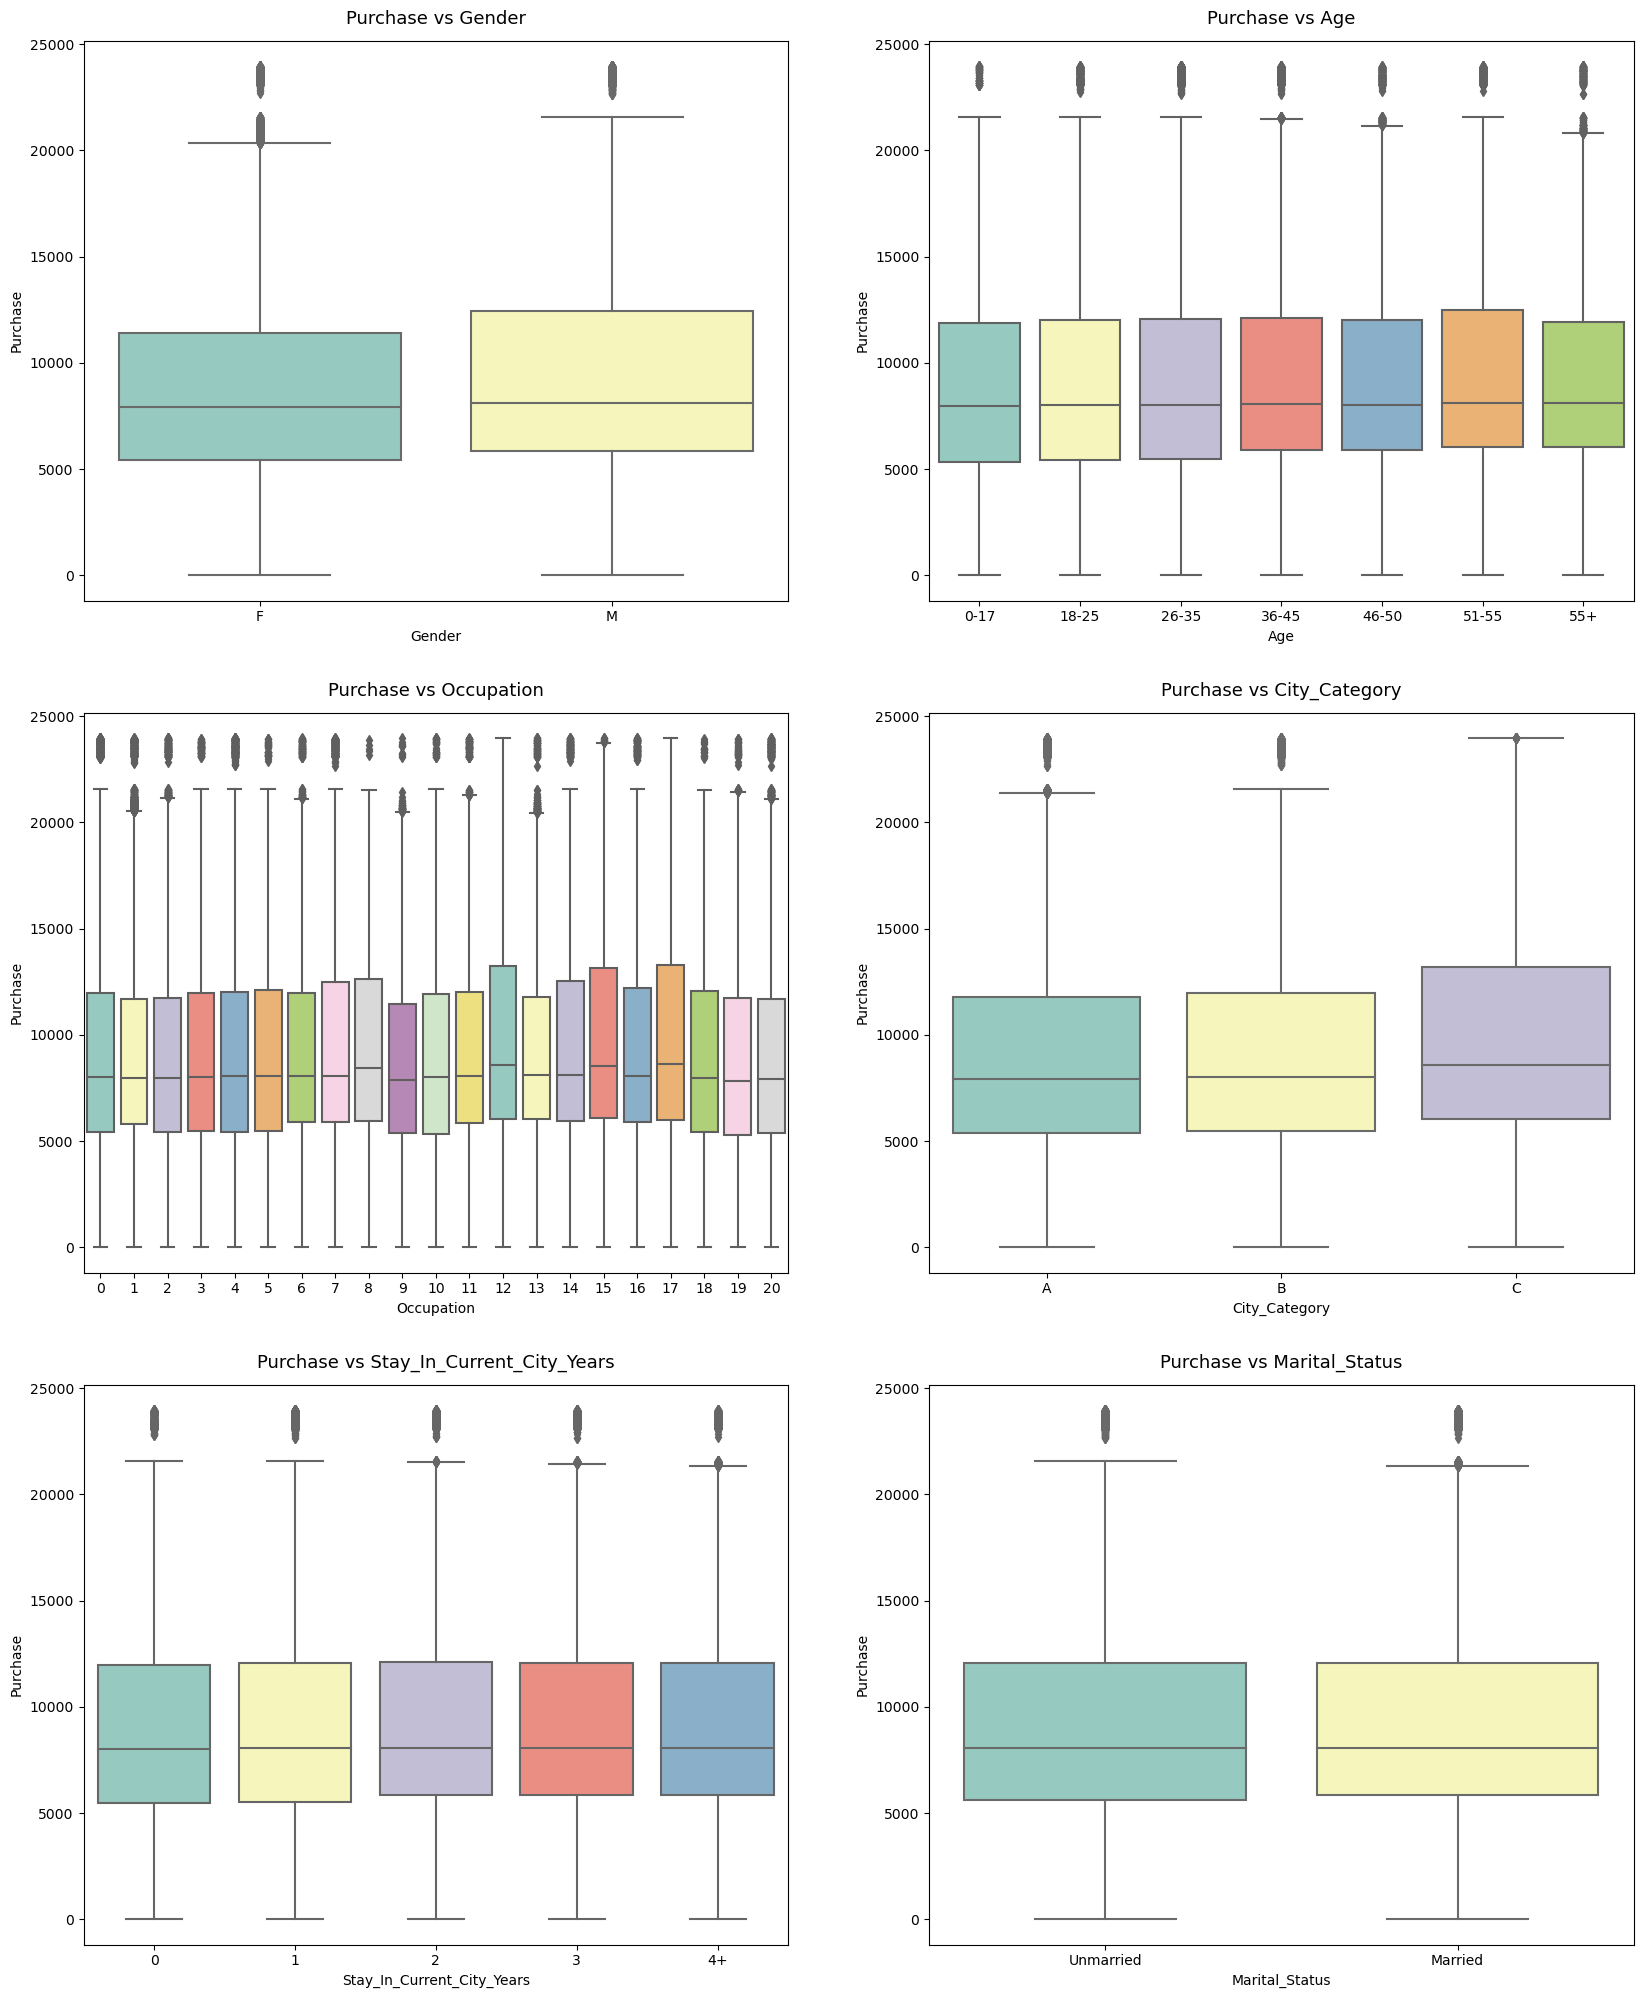

In [21]:
# Comparing Purchase Across Different Categories -

columns = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status','Product_Catgeory']


fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=columns[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {columns[count]}", pad=12, fontsize=13)
        count += 1
plt.show()


**Insights**
From the bivariate analysis of the effect of various parameters on purchase amount, we can derive the following insights:

**Gender vs. Purchase Amount:**
* Male customers tend to have a wider range of purchase amounts compared to females. The median purchase amount for both genders is similar, but there are more outliers among male customers.

**Age vs. Purchase Amount:**
* Customers in the age group 51-55 have the highest median purchase amount. Younger customers (age group 0-17 and 18-25) tend to have lower median purchase amounts. Age group 36-45 also exhibits a relatively higher median purchase amount.

**Occupation vs. Purchase Amount:**
* Occupation does not appear to have a significant impact on purchase amount, as the median values are relatively consistent across different occupation categories. However, there are variations in the spread of purchase amounts among different occupations, with some occupations having a wider range of spending.

**City Category vs. Purchase Amount:**
* Customers from City Category "B" tend to have slightly higher median purchase amounts compared to Categories "A" and "C." There is also more variability in purchase amounts within City Category "B."

**Stay in Current City vs. Purchase Amount:**
* The length of time customers have stayed in their current city does not appear to strongly influence purchase amounts. The median purchase amounts are fairly consistent across different stay durations.

**Marital Status vs. Purchase Amount:**
* Married and single customers exhibit similar median purchase amounts, but married customers tend to have a wider range of spending, with more outliers.

**Product Category vs. Purchase Amount:**
* Different product categories have varying impacts on purchase amounts. Some product categories show a wide range of spending with several outliers, while others have more consistent spending patterns.

Retail strategies can be tailored based on these findings, such as targeted marketing campaigns for specific age groups or product categories.

Additionally, understanding the variance in purchase amounts across different parameters can help in inventory management and pricing strategies.


## Multivariate Analysis


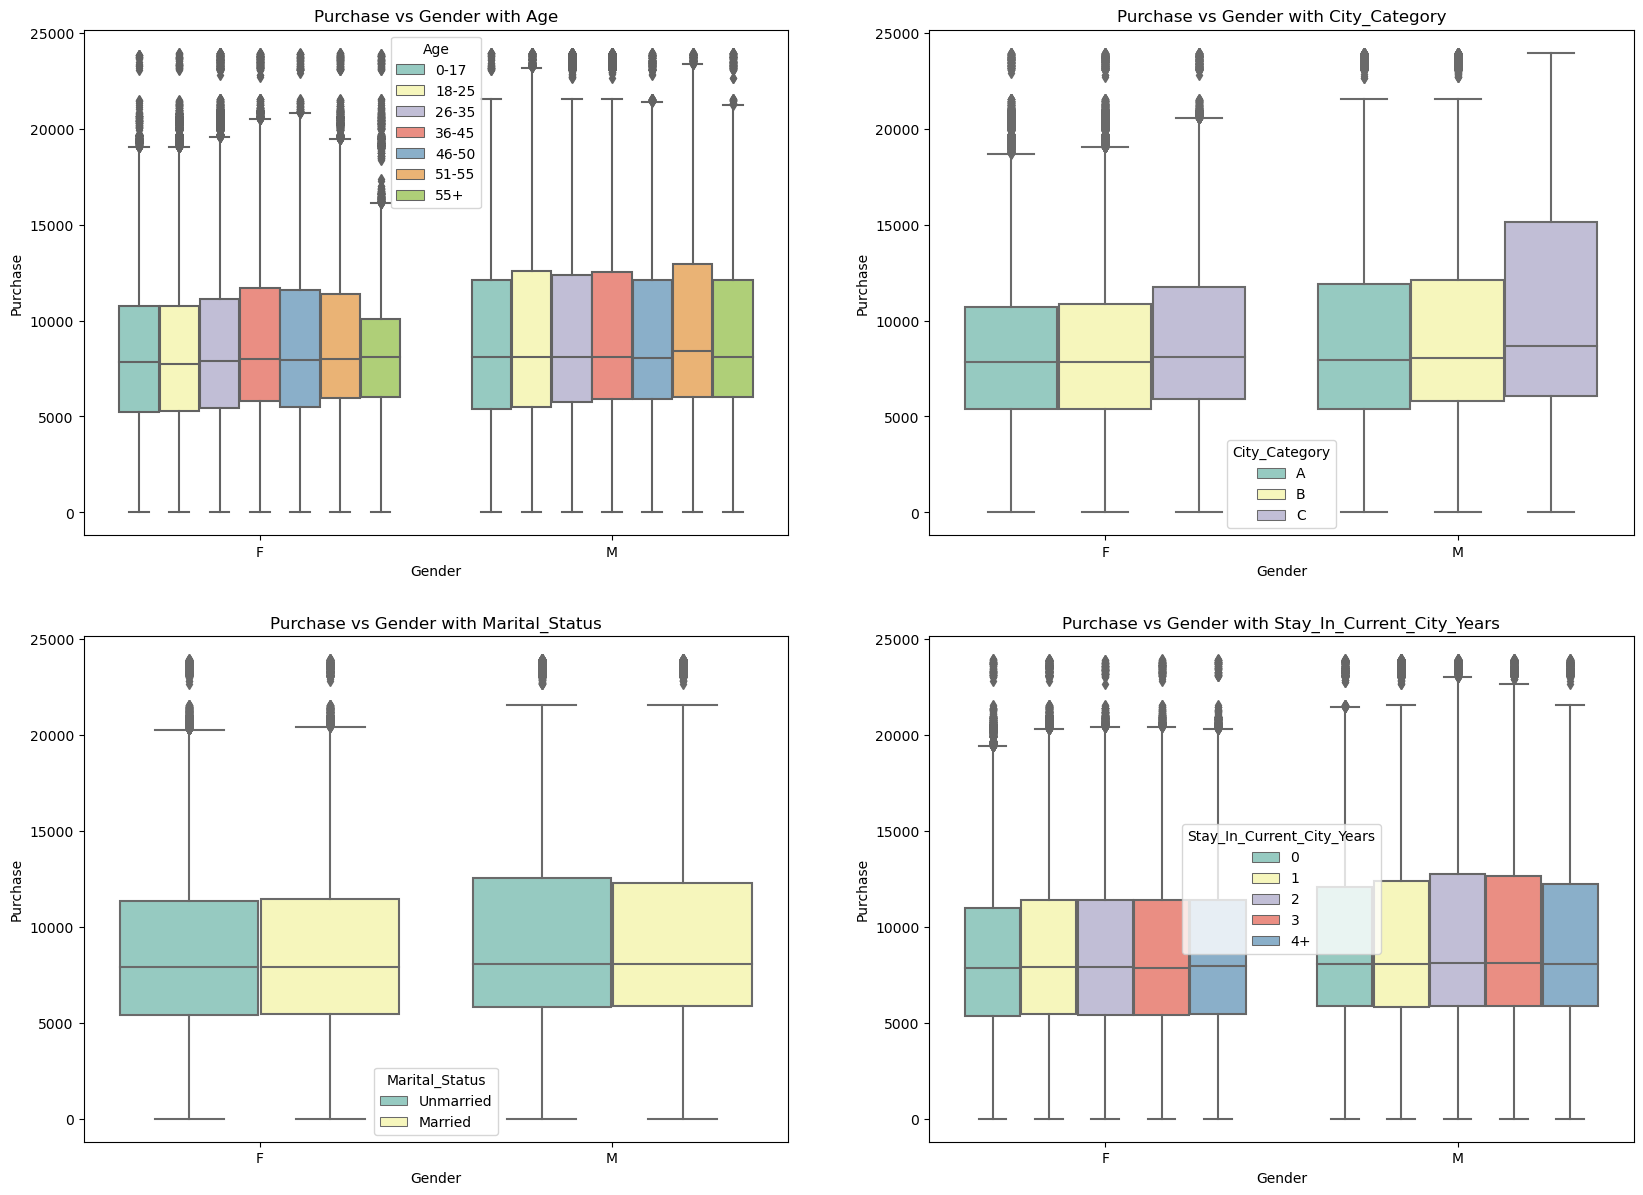

In [22]:
# Comparing Purchase Across Different Categories -

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
fig.subplots_adjust(top=1.5)

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0, 0])
axs[0, 0].set_title('Purchase vs Gender with Age')

sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0, 1])
axs[0, 1].set_title('Purchase vs Gender with City_Category')

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1, 0])
axs[1, 0].set_title('Purchase vs Gender with Marital_Status')

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1, 1])
axs[1, 1].set_title('Purchase vs Gender with Stay_In_Current_City_Years')

plt.show()


## Confidence intervals of Purchase amount with respect to Gender

In [23]:
round(df.groupby('Gender')['Purchase'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.57,4767.23,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.53,5092.19,12.0,5863.0,8098.0,12454.0,23961.0


 - Sample mean of Male and Females are 8734.6 and 9437.5 dollars.
 - To estimate Population spending, we need to build confidence intervals

In [24]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

* In one month, 1666 Females are spending around 8734.57 units on average & 7914.0 median. 4225 Males are spending an average of 9437.53 units and median 8098.0 units.


<Figure size 2000x800 with 0 Axes>

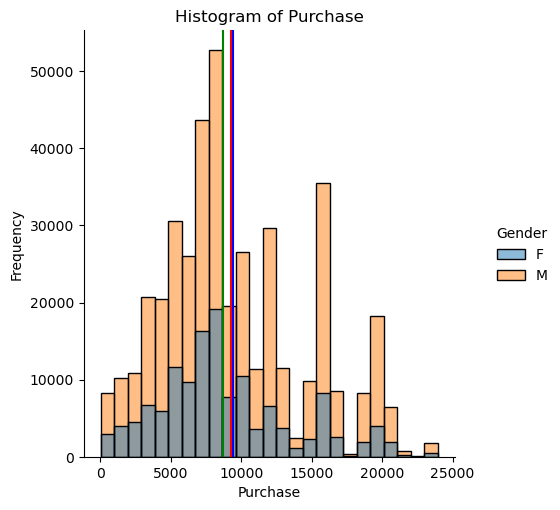

In [25]:
# Plotting all the observations -

plt.figure(figsize=(20, 8))
sns.displot(x='Purchase', data=df, bins=25, hue='Gender')
plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['Gender']=='M']['Purchase'].mean(), color='b')
plt.axvline(x=df[df['Gender']=='F']['Purchase'].mean(), color='g')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase')
plt.show()

* We can see that the distribution is close to normal.
* Thinking of this dataset as population, Let's first check if applying CLT on it's sample gives us actual characteristics of the population or not.


In [26]:
# Let us take a random sample (size = 300) from this data to analyse the sample mean -
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,66.0,8716.636364,4894.520068,60.0,5463.25,7489.0,9971.5,21158.0
M,234.0,8731.636752,4566.540445,24.0,5367.25,8018.5,11916.5,23223.0


* Every time we take a sample, our mean value is different. There is a variability in the sample mean itself. Does the sample mean itself follow a distribution? Let’s assess this.
* Let us pick around 1000 random samples of size 300 from the entire data set and calculate the mean of each sample.**

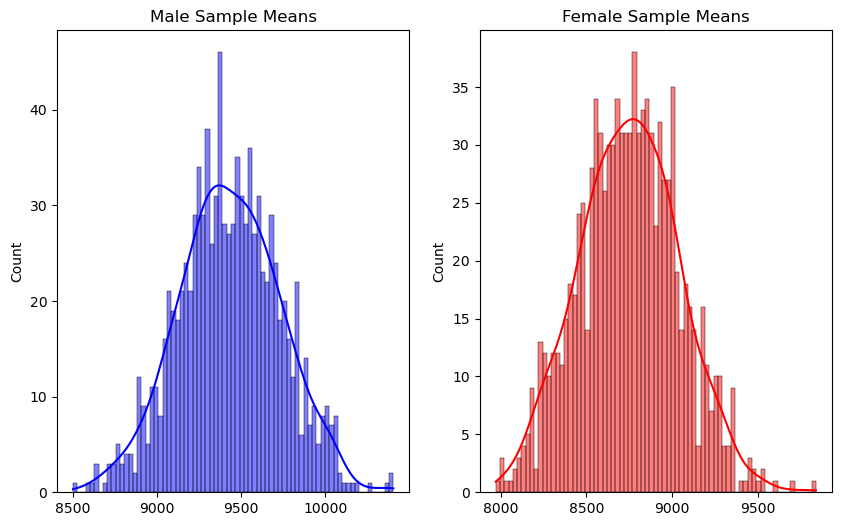

In [27]:
# Plotting distribution of male and female sample means -

size = 300
iteration = 1000
male_sample_means = [df[df['Gender']=='M']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
female_sample_means = [df[df['Gender']=='F']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.histplot(male_sample_means, bins=75, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Male Sample Means')

sns.histplot(female_sample_means, bins=75, kde=True, ax=axs[1], color='red')
axs[1].set_title('Female Sample Means')

plt.show()

* We can observe that the sampling distribution is nearly normal.
* Now we will compute the mean and standard deviation of this sampling distribution.


In [28]:
print('Mean for Males :', np.mean(male_sample_means).round(2))
print('Mean for Females :', np.mean(female_sample_means).round(2))


Mean for Males : 9432.79
Mean for Females : 8748.75


* The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean. This demonstrates the first property of the Central Limit theorem.
* Sampling Distribution Mean = Population Mean
* However, it would not be fair to infer that the population mean is exactly equal to the sample mean. It is because the defects in the sampling process always tend to cause some errors. Therefore, the sample mean’s value must be reported with some margin of error

In [29]:
def Gender(confidence_levels): 
    confidence = confidence_levels/100
    sample_means = [male_sample_means,female_sample_means]
    gender = ['Male','Female']
    print(f'For {confidence_levels}% Confidence Interval','\n')
    for i, sample_mean in enumerate(sample_means):
        confidence_interval = norm.interval(confidence, loc=np.mean(sample_mean), scale=pd.Series(sample_mean).std() / np.sqrt(1000))
        print(f'Confidence Interval of {gender[i]} customer in range at {confidence_levels}% Confidence level:{confidence_interval[0].round(2), confidence_interval[1].round(2)}\n')
    plt.show()

## For 90% Confidence Interval -

In [30]:
Gender(90)

For 90% Confidence Interval 

Confidence Interval of Male customer in range at 90% Confidence level:(9417.11, 9448.47)

Confidence Interval of Female customer in range at 90% Confidence level:(8733.55, 8763.95)



## For 95% Confidence Interval -

In [31]:
Gender(95)

For 95% Confidence Interval 

Confidence Interval of Male customer in range at 95% Confidence level:(9414.11, 9451.47)

Confidence Interval of Female customer in range at 95% Confidence level:(8730.64, 8766.86)



## For 99% Confidence Interval -

In [32]:
Gender(99)

For 99% Confidence Interval 

Confidence Interval of Male customer in range at 99% Confidence level:(9408.23, 9457.34)

Confidence Interval of Female customer in range at 99% Confidence level:(8724.95, 8772.55)



**Insights**
* The confidence intervals for male & female customers are clearly **not overlapping**
* From 1000 random samples of size 300, we can clearly say at 90%, 95% and 99% confidence level that male expenses are higher than female expenses

**Recommendations**
* Given that the average spending by males and females shows distinct ranges, Walmart can consider tailoring its marketing strategies accordingly. It can create gender-specific promotions, advertisements, or product recommendations to cater to the unique preferences and spending behaviors of each group.

## Confidence intervals of Purchase amount with respect to Martial Status

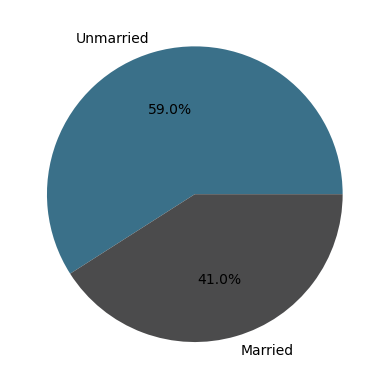

In [33]:
Martial_Status_counts = df['Marital_Status'].value_counts()
plt.pie(Martial_Status_counts, labels=['Unmarried','Married'], autopct='%1.1f%%', colors=["#3A7089", "#4b4b4c"])
plt.show()

In [34]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [35]:
# Number of unique user in each catgeory -
df.groupby('Marital_Status')['User_ID'].nunique()

Marital_Status
Unmarried    3417
Married      2474
Name: User_ID, dtype: int64

* There are total 3417 people are unmarried about 59% of total data and 2474 number of unique people are married about 41% of data

<Figure size 2000x800 with 0 Axes>

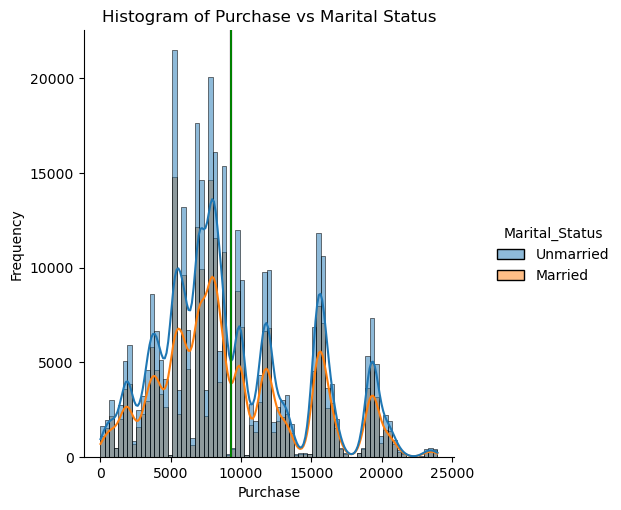

In [36]:
# Plotting all the observations -

plt.figure(figsize=(20, 8))
sns.displot(x='Purchase', data=df, bins=75, hue='Marital_Status',kde=True)
plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['Marital_Status']=='Married']['Purchase'].mean(), color='b')
plt.axvline(x=df[df['Marital_Status']=='Unmarried']['Purchase'].mean(), color='g')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase vs Marital Status')
plt.show()

* It is observed that the distribution is close to normal

In [37]:
# Let us take a random sample (size = 300) from this data to analyse the sample mean -
df.sample(300).groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,187.0,8771.925134,4797.457070,1434.0,5342.5,7803.0,11691.0,20723.0
Married,113.0,9703.088496,4585.728824,26.0,6181.0,8122.0,13181.0,21478.0


* Every time we take a sample, our mean value is different. There is a variability in the sample mean itself. Does the sample mean itself follow a distribution? Let’s assess this.
* Let us pick around 1000 random samples of size 300 from the entire data set and calculate the mean of each sample.

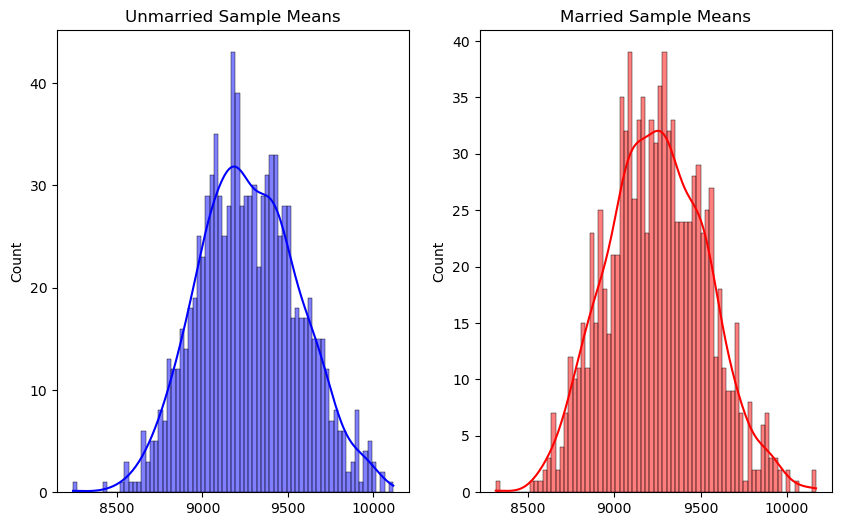

In [38]:
# Plotting distribution of Unmarried and Married sample means -

size = 300
iteration = 1000
Unmarried_sample_means = [df[df['Marital_Status']=='Unmarried']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
Married_sample_means = [df[df['Marital_Status']=='Married']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.histplot(Unmarried_sample_means, bins=75, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Unmarried Sample Means')

sns.histplot(Married_sample_means, bins=75, kde=True, ax=axs[1], color='red')
axs[1].set_title('Married Sample Means')

plt.show()

* We can see that the sampling distribution is very close to normal.
* Computing the mean and standard deviation of this sampling distribution.

In [39]:
print('Unmarried for Males :', np.mean(Unmarried_sample_means).round(2))
print('Married for Females :', np.mean(Married_sample_means).round(2))

Unmarried for Males : 9272.21
Married for Females : 9246.13


* The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean. This demonstrates the first property of the Central Limit theorem.
* Sampling Distribution Mean = Population Mean
* However, it would not be fair to infer that the population mean is exactly equal to the sample mean. It is because the defects in the sampling process always tend to cause some errors. Therefore, the sample mean’s value must be reported with some margin of error

In [40]:
def Marital_Status(confidence_levels): 
    confidence = confidence_levels/100
    sample_means = [Unmarried_sample_means,Married_sample_means]
    marital_status = ['Unmarried','Married']
    print(f'For {confidence_levels}% Confidence Interval','\n')
    for i, sample_mean in enumerate(sample_means):
        confidence_interval = norm.interval(confidence, loc=np.mean(sample_mean),scale=pd.Series(sample_mean).std() / np.sqrt(1000))
        print(f'Confidence Interval of {marital_status[i]} customer in range at {confidence_levels}% Confidence level:{confidence_interval[0].round(2), confidence_interval[1].round(2)}\n')

    plt.show()

## For 90% Confidence Interval -

In [41]:
Marital_Status(90)

For 90% Confidence Interval 

Confidence Interval of Unmarried customer in range at 90% Confidence level:(9256.91, 9287.52)

Confidence Interval of Married customer in range at 90% Confidence level:(9231.21, 9261.05)



## For 95% Confidence Interval -

In [42]:
Marital_Status(95)

For 95% Confidence Interval 

Confidence Interval of Unmarried customer in range at 95% Confidence level:(9253.98, 9290.45)

Confidence Interval of Married customer in range at 95% Confidence level:(9228.35, 9263.91)



## For 99% Confidence Interval -

In [43]:
Marital_Status(99)

For 99% Confidence Interval 

Confidence Interval of Unmarried customer in range at 99% Confidence level:(9248.25, 9296.18)

Confidence Interval of Married customer in range at 99% Confidence level:(9222.76, 9269.5)



**Insights**
* The confidence intervals for married & unmarried customers is overlapping in all Interval(90, 95 and 99).
* From 1000 random samples of size 300, we can't say that Unmarried customer expenses are higher than married expenses

**Recommendations**
* Walmart can give more offers to both married and unmarried because both are making profit to the company

## Confidence intervals of Purchase amount with respect to Age groups

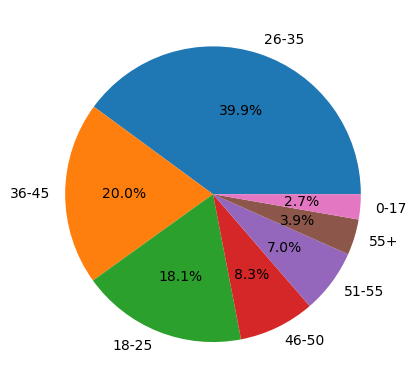

In [44]:
age_group_count = df['Age'].value_counts()
plt.pie(age_group_count,labels=age_group_count.index, autopct='%1.1f%%')
plt.show()

In [45]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


<Figure size 2000x2500 with 0 Axes>

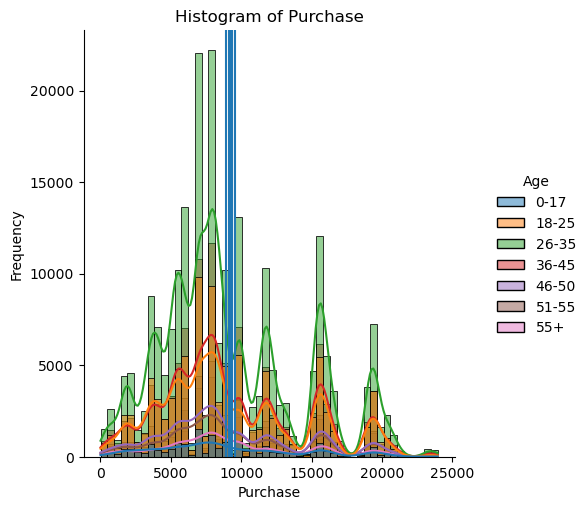

In [46]:
# Plotting all the observations -

plt.figure(figsize=(20, 25))
sns.displot(x='Purchase', data=df, bins=50, hue='Age',kde=True)
plt.axvline(x=df['Purchase'].mean())
plt.axvline(df[df['Age']=='0-17']['Purchase'].mean())
plt.axvline(df[df['Age']=='18-25']['Purchase'].mean())
plt.axvline(df[df['Age']=='26-35']['Purchase'].mean())
plt.axvline(df[df['Age']=='36-45']['Purchase'].mean())
plt.axvline(df[df['Age']=='46-50']['Purchase'].mean())
plt.axvline(df[df['Age']=='51-55']['Purchase'].mean())
plt.axvline(df[df['Age']=='55+']['Purchase'].mean())
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase')
plt.show()

* we can see clearly se that under age group of 26-35 has more number of transactions 
* It is observed that the distribution is close to normal

In [47]:
# Let us take a random sample (size = 300) from this data to analyse the sample mean -
df.sample(300).groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,10.0,9100.000000,5140.881096,1756.0,5505.25,8196.0,14297.75,15857.0
18-25,59.0,9133.101695,4924.467728,2036.0,5292.00,7791.0,12074.50,20923.0
26-35,118.0,9011.559322,5378.733404,25.0,5280.75,7864.5,11834.50,20623.0
36-45,55.0,9919.054545,5232.818469,354.0,6916.50,8828.0,12315.00,20242.0
46-50,25.0,9273.440000,4894.746428,1515.0,5342.00,8276.0,12821.00,19124.0
51-55,20.0,8083.100000,4651.697029,1413.0,5070.00,7367.5,9904.75,20765.0
55+,13.0,11201.076923,5814.636410,944.0,7161.00,9896.0,16459.00,19497.0


* Every time we take a sample, our mean value is different. There is a variability in the sample mean itself. Does the sample mean itself follow a distribution? Let’s assess this.
* Let us pick around 1000 random samples of size 300 from the entire data set and calculate the mean of each sample.**

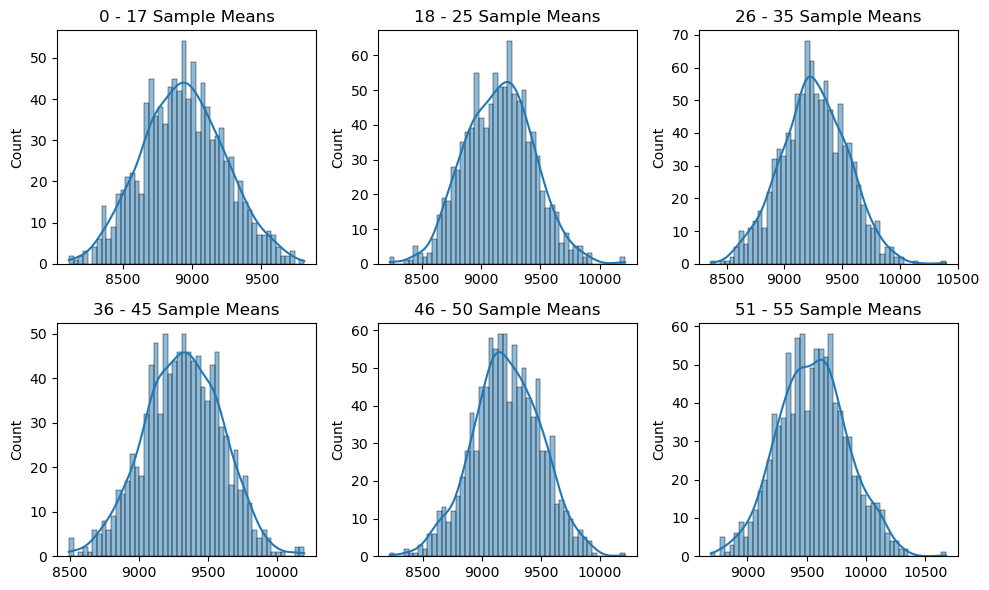

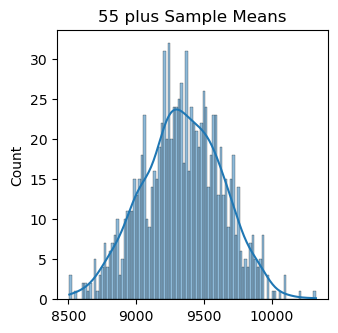

In [48]:
# Plotting distribution off all age groups sample means -

size = 300
iteration = 1000
sample_mean_0_17  = [df[df['Age']=='0-17']['Purchase'].sample(size,replace=True).mean()  for i in range(iteration)]
sample_mean_18_25 = [df[df['Age']=='18-25']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sample_mean_26_35 = [df[df['Age']=='26-35']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sample_mean_36_45 = [df[df['Age']=='36-45']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sample_mean_46_50 = [df[df['Age']=='46-50']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sample_mean_51_55 = [df[df['Age']=='51-55']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sample_mean_55_plus=[df[df['Age']=='55+']['Purchase'].sample(size,replace=True).mean()   for i in range(iteration)]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

sns.histplot(sample_mean_0_17, bins=50, kde=True, ax=axs[0,0])
axs[0,0].set_title('0 - 17 Sample Means')

sns.histplot(sample_mean_18_25, bins=50, kde=True, ax=axs[0,1])
axs[0,1].set_title('18 - 25 Sample Means')

sns.histplot(sample_mean_26_35, bins=50, kde=True, ax=axs[0,2])
axs[0,2].set_title('26 - 35 Sample Means')

sns.histplot(sample_mean_36_45, bins=50, kde=True, ax=axs[1,0])
axs[1,0].set_title('36 - 45 Sample Means')

sns.histplot(sample_mean_46_50, bins=50, kde=True, ax=axs[1,1])
axs[1,1].set_title('46 - 50 Sample Means')

sns.histplot(sample_mean_51_55, bins=50, kde=True, ax=axs[1,2])
axs[1,2].set_title('51 - 55 Sample Means')

plt.tight_layout()
plt.show()

plt.figure(figsize=(3.5,3.5))
plt.subplot(1, 1, 1)
sns.histplot(sample_mean_55_plus, bins=100, kde=True)
plt.title('55 plus Sample Means')
plt.show()

* We can see that the sampling distribution is very close to normal.
* Computing the mean and standard deviation of this sampling distribution.

In [49]:
print('0 - 17 Sample Means :', np.mean(sample_mean_0_17).round(2))
print('18 - 25 Sample Means :', np.mean(sample_mean_18_25).round(2))
print('26 - 35 Sample Means :', np.mean(sample_mean_26_35).round(2))
print('36 - 45 Sample Means :', np.mean(sample_mean_36_45).round(2))
print('46 - 50 Sample Means :', np.mean(sample_mean_46_50).round(2))
print('51 - 55 Sample Means :', np.mean(sample_mean_51_55).round(2))
print('55 plus Sample Means :', np.mean(sample_mean_55_plus).round(2))


0 - 17 Sample Means : 8936.94
18 - 25 Sample Means : 9153.8
26 - 35 Sample Means : 9256.97
36 - 45 Sample Means : 9320.41
46 - 50 Sample Means : 9211.7
51 - 55 Sample Means : 9552.5
55 plus Sample Means : 9338.56


* The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean. This demonstrates the first property of the Central Limit theorem.
* Sampling Distribution Mean = Population Mean

* However, it would not be fair to infer that the population mean is exactly equal to the sample mean. It is because the defects in the sampling process always tend to cause some errors. Therefore, the sample mean’s value must be reported with some margin of error

In [50]:
def Age(confidence_levels): 
    confidence = confidence_levels/100
    sample_means = [sample_mean_0_17, sample_mean_18_25, sample_mean_26_35, sample_mean_36_45, sample_mean_46_50, sample_mean_51_55,sample_mean_55_plus]
    range_age = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
    print(f'For {confidence_levels}% Confidence Interval','\n')
    for i, sample_mean in enumerate(sample_means):
        confidence_interval = norm.interval(confidence, loc=np.mean(sample_mean),scale=pd.Series(sample_mean).std() / np.sqrt(1000))
        print(f'Confidence Interval of customers in {range_age[i]} age range at {confidence_levels}% Confidence level:{confidence_interval[0].round(2), confidence_interval[1].round(2)}\n')
    plt.show()

## For 90% Confidence Interval -

In [51]:
Age(90)  

For 90% Confidence Interval 

Confidence Interval of customers in 0-17 age range at 90% Confidence level:(8921.43, 8952.45)

Confidence Interval of customers in 18-25 age range at 90% Confidence level:(9138.88, 9168.73)

Confidence Interval of customers in 26-35 age range at 90% Confidence level:(9242.03, 9271.9)

Confidence Interval of customers in 36-45 age range at 90% Confidence level:(9305.91, 9334.92)

Confidence Interval of customers in 46-50 age range at 90% Confidence level:(9196.71, 9226.7)

Confidence Interval of customers in 51-55 age range at 90% Confidence level:(9537.3, 9567.69)

Confidence Interval of customers in 55+ age range at 90% Confidence level:(9323.26, 9353.85)



## For 95% Confidence Interval -

In [52]:
Age(95)

For 95% Confidence Interval 

Confidence Interval of customers in 0-17 age range at 95% Confidence level:(8918.46, 8955.43)

Confidence Interval of customers in 18-25 age range at 95% Confidence level:(9136.02, 9171.59)

Confidence Interval of customers in 26-35 age range at 95% Confidence level:(9239.17, 9274.76)

Confidence Interval of customers in 36-45 age range at 95% Confidence level:(9303.13, 9337.69)

Confidence Interval of customers in 46-50 age range at 95% Confidence level:(9193.84, 9229.57)

Confidence Interval of customers in 51-55 age range at 95% Confidence level:(9534.39, 9570.6)

Confidence Interval of customers in 55+ age range at 95% Confidence level:(9320.33, 9356.79)



## For 99% Confidence Interval -

In [53]:
Age(99)

For 99% Confidence Interval 

Confidence Interval of customers in 0-17 age range at 99% Confidence level:(8912.66, 8961.23)

Confidence Interval of customers in 18-25 age range at 99% Confidence level:(9130.43, 9177.17)

Confidence Interval of customers in 26-35 age range at 99% Confidence level:(9233.58, 9280.35)

Confidence Interval of customers in 36-45 age range at 99% Confidence level:(9297.7, 9343.13)

Confidence Interval of customers in 46-50 age range at 99% Confidence level:(9188.23, 9235.18)

Confidence Interval of customers in 51-55 age range at 99% Confidence level:(9528.71, 9576.28)

Confidence Interval of customers in 55+ age range at 99% Confidence level:(9314.6, 9362.51)



**Insights**
* The confidence intervals for different age group is overlapping in some and some do not.
* From 1000 random samples of size 300, we can't say that which age group is performing better

**Recommendations**
* Walmart can give more offers to all age groups because there is high chances of making all profit all 

## Confidence intervals of Purchase amount with respect to City_Category

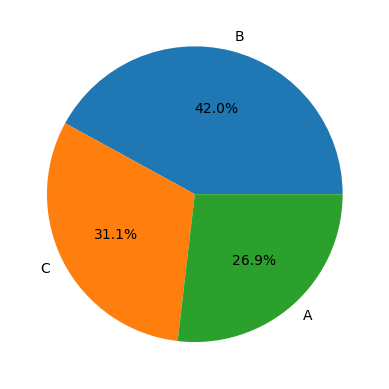

In [54]:
city_catgeory_count = df['City_Category'].value_counts()
plt.pie(city_catgeory_count,labels = city_catgeory_count.index, autopct='%1.1f%%')
plt.show()

In [55]:
df.groupby('City_Category')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


<Figure size 2000x800 with 0 Axes>

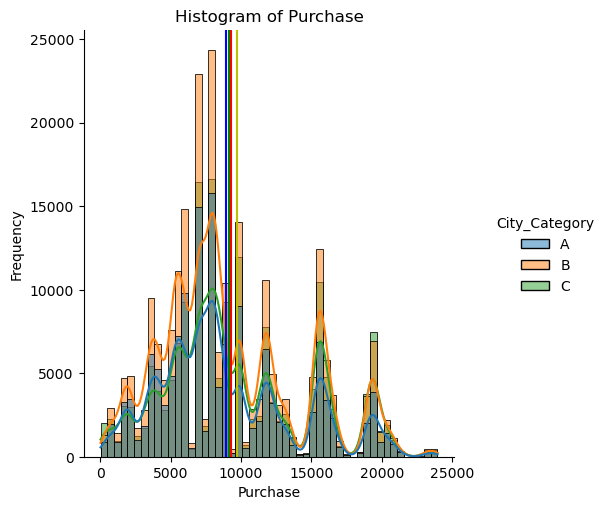

In [56]:
# Plotting all the observations -

plt.figure(figsize=(20, 8))
sns.displot(x='Purchase', data=df, bins=50, hue='City_Category',kde=True)
plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['City_Category']=='A']['Purchase'].mean(), color='b')
plt.axvline(x=df[df['City_Category']=='B']['Purchase'].mean(), color='g')
plt.axvline(x=df[df['City_Category']=='C']['Purchase'].mean(), color='y')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase')
plt.show()

* we can see clearly se that under age group of 26-35 has more number of transactions 
* It is observed that the distribution is close to normal

In [57]:
# Let us take a random sample (size = 300) from this data to analyse the sample mean.
df.sample(300).groupby('City_Category')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,74.0,9576.418919,5237.304964,13.0,5950.75,8359.0,13084.25,23361.0
B,130.0,9143.753846,4599.809807,384.0,5878.50,8286.5,11939.25,19895.0
C,96.0,10049.822917,5121.921671,476.0,6571.00,8795.5,15208.25,23768.0


* Every time we take a sample, our mean value is different. There is a variability in the sample mean itself. Does the sample mean itself follow a distribution? Let’s assess this.
* Let us pick around 1000 random samples of size 300 from the entire data set and calculate the mean of each sample.

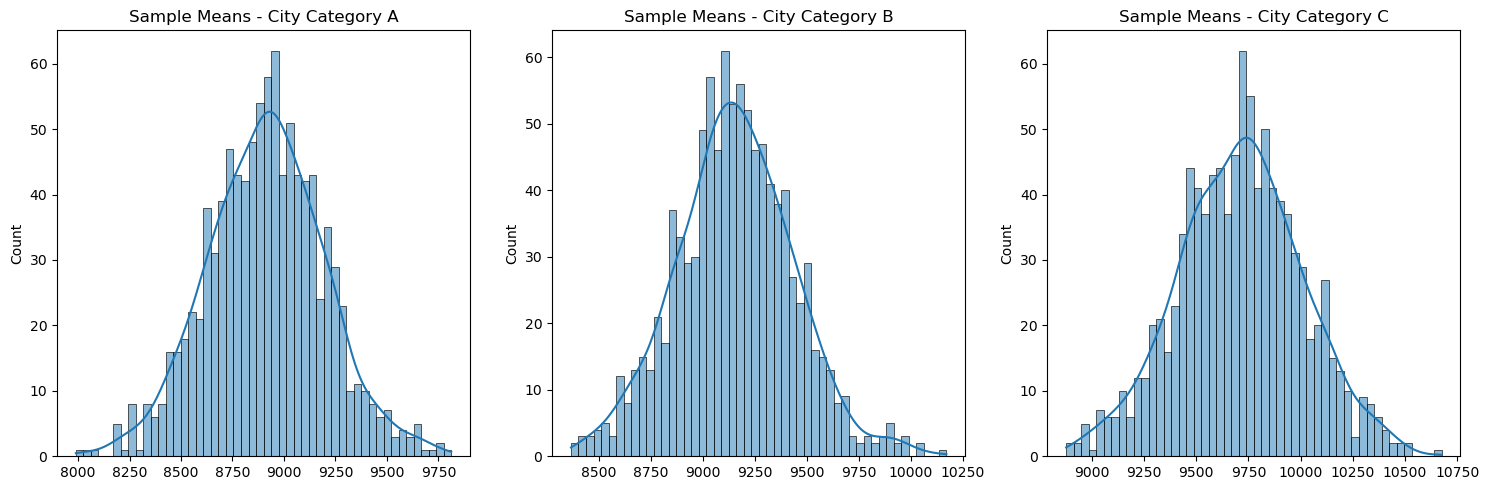

In [58]:
# Ploting distributions city category sample means -

size = 300
iteration = 1000
sample_mean_A = [df[df['City_Category']=='A']['Purchase'].sample(size,replace=True).mean()  for i in range(iteration)]
sample_mean_B = [df[df['City_Category']=='B']['Purchase'].sample(size,replace=True).mean()  for i in range(iteration)]
sample_mean_C = [df[df['City_Category']=='C']['Purchase'].sample(size,replace=True).mean()  for i in range(iteration)]

sample_means = [sample_mean_A, sample_mean_B, sample_mean_C]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, sample_mean in enumerate(sample_means):
    sns.histplot(sample_mean, bins=50, kde=True, ax=axs[i])
    axs[i].set_title(f'Sample Means - City Category {chr(65 + i)}')
plt.tight_layout()
plt.show()


* We can see that the sampling distribution is very close to normal.
* Computing the mean and standard deviation of this sampling distribution.

In [59]:
print('A Sample Means :', np.mean(sample_mean_A).round(2))
print('B Sample Means :', np.mean(sample_mean_B).round(2))
print('C Sample Means :', np.mean(sample_mean_C).round(2))

A Sample Means : 8913.22
B Sample Means : 9154.92
C Sample Means : 9712.35


* The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean. This demonstrates the first property of the Central Limit theorem.
* Sampling Distribution Mean = Population Mean
* However, it would not be fair to infer that the population mean is exactly equal to the sample mean. It is because the defects in the sampling process always tend to cause some errors. Therefore, the sample mean’s value must be reported with some margin of error

In [60]:
def City_Category(confidence_levels): 
    confidence = confidence_levels/100
    sample_means = [sample_mean_A, sample_mean_B, sample_mean_C]
    print(f'For {confidence_levels}% Confidence Interval','\n')
    for i, sample_mean in enumerate(sample_means):
        confidence_interval = norm.interval(confidence, loc=np.mean(sample_mean), scale=pd.Series(sample_mean).std() / np.sqrt(1000))
        print(f'Confidence Interval of customer For City Category {chr(65+i)} range at {confidence_levels}% Confidence level:{confidence_interval[0].round(2), confidence_interval[1].round(2)}\n')
    plt.show()

## For 90% Confidence Interval -

In [61]:
City_Category(90)

For 90% Confidence Interval 

Confidence Interval of customer For City Category A range at 90% Confidence level:(8898.53, 8927.9)

Confidence Interval of customer For City Category B range at 90% Confidence level:(9140.28, 9169.55)

Confidence Interval of customer For City Category C range at 90% Confidence level:(9696.91, 9727.79)



## For 95% Confidence Interval -

In [62]:
City_Category(95)

For 95% Confidence Interval 

Confidence Interval of customer For City Category A range at 95% Confidence level:(8895.71, 8930.72)

Confidence Interval of customer For City Category B range at 95% Confidence level:(9137.48, 9172.36)

Confidence Interval of customer For City Category C range at 95% Confidence level:(9693.95, 9730.75)



## For 99% Confidence Interval -

In [63]:
City_Category(99)

For 99% Confidence Interval 

Confidence Interval of customer For City Category A range at 99% Confidence level:(8890.21, 8936.22)

Confidence Interval of customer For City Category B range at 99% Confidence level:(9132.0, 9177.84)

Confidence Interval of customer For City Category C range at 99% Confidence level:(9688.17, 9736.53)



**Insights**
* The confidence intervals for Category A, B and c customers are clearly **not overlapping**
* From 1000 random samples of size 300, we can clearly say at 95% and 99% confidence level City Category B expenses are higher compared A and C expenses

**Recommendations**
* To boost sales, prioritize City Categories A and C. Develop targeted marketing and promotions for these areas. Understand the preferences of customers in these categories to tailor products and services. This strategic approach can lead to significant sales improvement.

## Confidence intervals of Purchase amount with respect to Stay_In_Current_City_Years

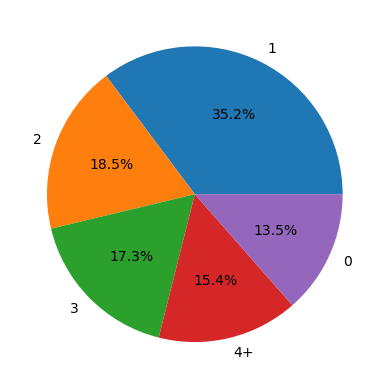

In [64]:
Stay_In_Current_City_Years_count = df['Stay_In_Current_City_Years'].value_counts()
plt.pie(Stay_In_Current_City_Years_count, labels = Stay_In_Current_City_Years_count.index, autopct='%1.1f%%')
plt.show()

* More number of  people stay 1 year in one city

In [65]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


<Figure size 2000x800 with 0 Axes>

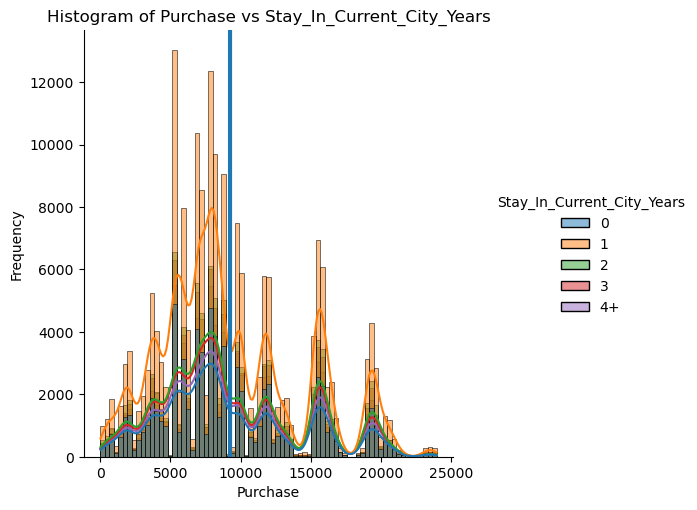

In [66]:
# Plotting all the observations -

plt.figure(figsize=(20, 8))
sns.displot(x='Purchase', data=df, bins=75, hue='Stay_In_Current_City_Years',kde=True)
plt.axvline(x=df['Purchase'].mean())
plt.axvline(x=df[df['Stay_In_Current_City_Years']=='0']['Purchase'].mean())
plt.axvline(x=df[df['Stay_In_Current_City_Years']=='1']['Purchase'].mean())
plt.axvline(x=df[df['Stay_In_Current_City_Years']=='2']['Purchase'].mean())
plt.axvline(x=df[df['Stay_In_Current_City_Years']=='3']['Purchase'].mean())
plt.axvline(x=df[df['Stay_In_Current_City_Years']=='4+']['Purchase'].mean())
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase vs Stay_In_Current_City_Years')
plt.show()

* we can see clearly se that more number people love to stay one year in particular city
* It is observed that the distribution is close to normal

In [67]:
# Let us take a random sample (size = 300) from this data to analyse the sample mean -
df.sample(300).groupby('Stay_In_Current_City_Years')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,44.0,9811.477273,5001.947051,1610.0,7116.5,9760.0,11943.0,20912.0
1,103.0,8923.135922,4197.595474,752.0,6526.0,8090.0,11484.5,20958.0
2,57.0,8929.421053,4077.404185,1730.0,5929.0,8122.0,11543.0,20042.0
3,49.0,8300.714286,5265.368727,255.0,5179.0,7954.0,10027.0,23766.0
4+,47.0,7699.531915,4418.268630,373.0,4825.5,6986.0,9465.0,16663.0


* Every time we take a sample, our mean value is different. There is a variability in the sample mean itself. Does the sample mean itself follow a distribution? Let’s assess this.
* Let us pick around 1000 random samples of size 300 from the entire data set and calculate the mean of each sample.

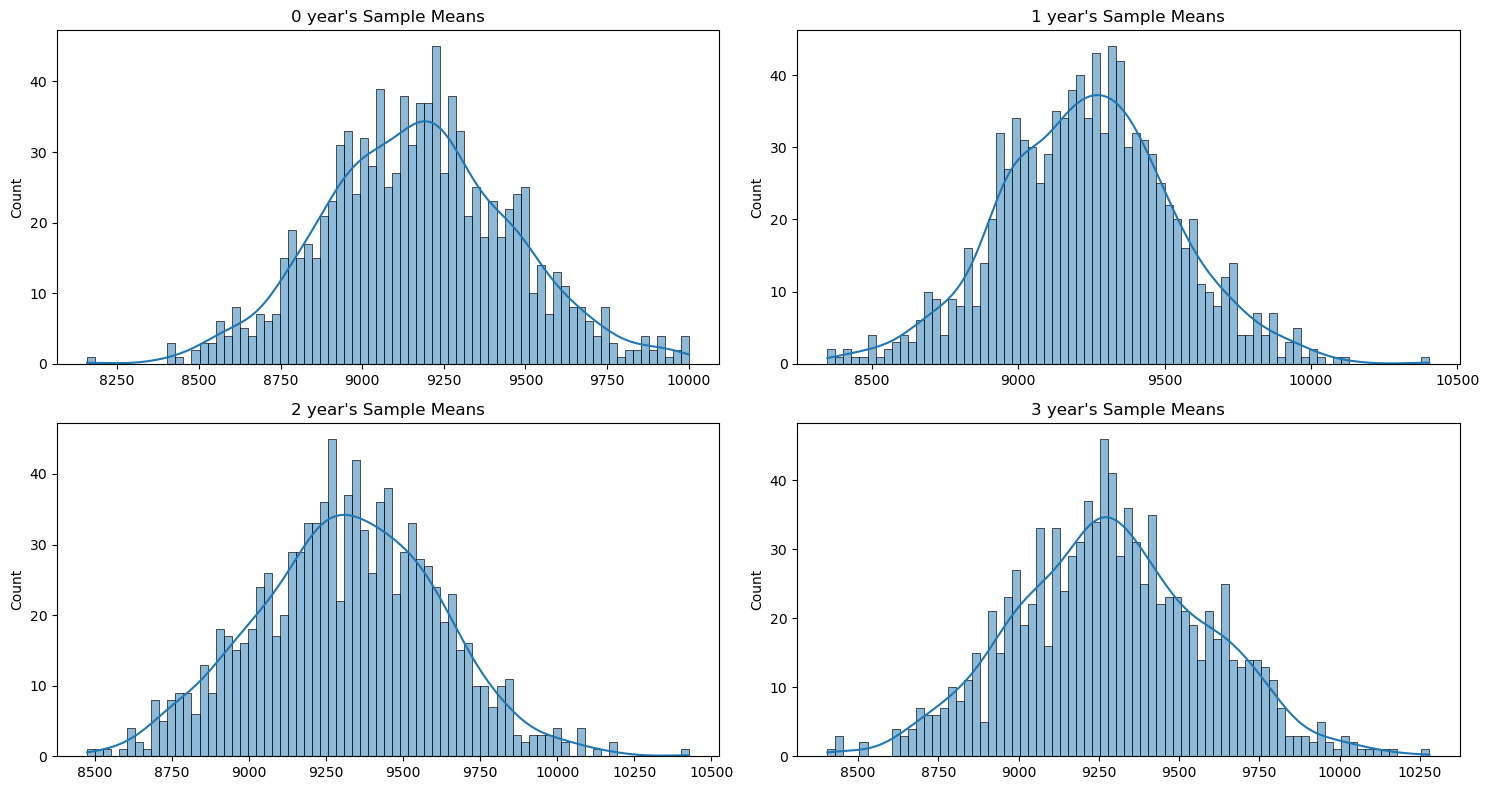

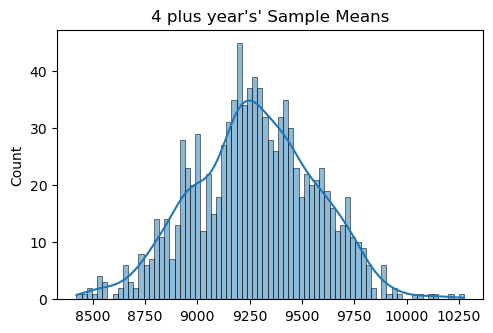

In [68]:
# Plotting distribution of Stay_In_Current_City_Years all sample means -

size = 300
iteration = 1000
sample_mean_0 = [df[df['Stay_In_Current_City_Years'] =='0' ]['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sample_mean_1 = [df[df['Stay_In_Current_City_Years'] =='1' ]['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sample_mean_2 = [df[df['Stay_In_Current_City_Years'] =='2' ]['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sample_mean_3 = [df[df['Stay_In_Current_City_Years'] =='3' ]['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sample_mean_4_plus = [df[df['Stay_In_Current_City_Years'] =='4+' ]['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]

sample_mean = [sample_mean_0, sample_mean_1, sample_mean_2, sample_mean_3]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
for i,ax in enumerate(axs.flatten()):
    sns.histplot(sample_mean[i], bins=75, kde=True, ax=ax)
    ax.set_title(f'{i} year\'s Sample Means')
plt.tight_layout()

plt.figure(figsize=(5.5, 3.5))
plt.subplot(1, 1, 1)
sample_means_4_plus = [df[df['Stay_In_Current_City_Years'] == '4+']['Purchase'].sample(size,replace=True).mean() for i in range(iteration)]
sns.histplot(sample_means_4_plus, bins=75, kde=True)
plt.title('4 plus year\'s\' Sample Means')
plt.show()


* We can see that the sampling distribution is very close to normal.
* Computing the mean and standard deviation of this sampling distribution.

In [69]:
print('0 year\'s Sample Means :', np.mean(sample_mean_0).round(2))
print('1 year\'s Sample Means :', np.mean(sample_mean_1).round(2))
print('2 year\'s Sample Means :', np.mean(sample_mean_2).round(2))
print('3 year\'s Sample Means :', np.mean(sample_mean_3).round(2))
print('4+ year\'s Sample Means :', np.mean(sample_mean_4_plus).round(2))


0 year's Sample Means : 9171.46
1 year's Sample Means : 9236.62
2 year's Sample Means : 9319.04
3 year's Sample Means : 9287.43
4+ year's Sample Means : 9280.11


* The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean. This demonstrates the first property of the Central Limit theorem.
* Sampling Distribution Mean = Population Mean
* However, it would not be fair to infer that the population mean is exactly equal to the sample mean. It is because the defects in the sampling process always tend to cause some errors. Therefore, the sample mean’s value must be reported with some margin of error

In [70]:
def Stay_In_Current_City_Years(confidence_levels): 
    confidence = confidence_levels/100
    sample_means = [sample_mean_0, sample_mean_1, sample_mean_2, sample_mean_3, sample_mean_4_plus]
    print(f'For {confidence_levels}% Confidence Interval','\n')
    for i, sample_mean in enumerate(sample_means):
        confidence_interval = norm.interval(confidence, loc=np.mean(sample_mean),scale=pd.Series(sample_mean).std() / np.sqrt(1000))
        if i == 4:
            print(f'Confidence Interval of customer For Stay In Current City {i} plus year\'s  range at {confidence_levels}% Confidence level:{confidence_interval[0].round(2), confidence_interval[1].round(2)}\n')
        else:
            print(f'Confidence Interval of customer For Stay In Current City {i} year\'s  range at {confidence_levels}% Confidence level:{confidence_interval[0].round(2), confidence_interval[1].round(2)}\n')
    plt.show()

## For 90% Confidence Interval -

In [71]:
Stay_In_Current_City_Years(90)

For 90% Confidence Interval 

Confidence Interval of customer For Stay In Current City 0 year's  range at 90% Confidence level:(9156.47, 9186.46)

Confidence Interval of customer For Stay In Current City 1 year's  range at 90% Confidence level:(9221.26, 9251.98)

Confidence Interval of customer For Stay In Current City 2 year's  range at 90% Confidence level:(9303.7, 9334.39)

Confidence Interval of customer For Stay In Current City 3 year's  range at 90% Confidence level:(9271.88, 9302.98)

Confidence Interval of customer For Stay In Current City 4 plus year's  range at 90% Confidence level:(9265.02, 9295.19)



## For 95% Confidence Interval -

In [72]:
Stay_In_Current_City_Years(95)

For 95% Confidence Interval 

Confidence Interval of customer For Stay In Current City 0 year's  range at 95% Confidence level:(9153.59, 9189.34)

Confidence Interval of customer For Stay In Current City 1 year's  range at 95% Confidence level:(9218.32, 9254.93)

Confidence Interval of customer For Stay In Current City 2 year's  range at 95% Confidence level:(9300.76, 9337.33)

Confidence Interval of customer For Stay In Current City 3 year's  range at 95% Confidence level:(9268.91, 9305.95)

Confidence Interval of customer For Stay In Current City 4 plus year's  range at 95% Confidence level:(9262.13, 9298.08)



## For 99% Confidence Interval -

In [73]:
Stay_In_Current_City_Years(99)

For 99% Confidence Interval 

Confidence Interval of customer For Stay In Current City 0 year's  range at 99% Confidence level:(9147.98, 9194.95)

Confidence Interval of customer For Stay In Current City 1 year's  range at 99% Confidence level:(9212.57, 9260.68)

Confidence Interval of customer For Stay In Current City 2 year's  range at 99% Confidence level:(9295.01, 9343.07)

Confidence Interval of customer For Stay In Current City 3 year's  range at 99% Confidence level:(9263.08, 9311.78)

Confidence Interval of customer For Stay In Current City 4 plus year's  range at 99% Confidence level:(9256.48, 9303.73)




**Insights**
* There are overlaps in almost all the categories in this case, so the years stayed in the city doesnt have a big impact on the Purchasing power of users.
* From 1000 random samples of size 300, the users who have stayed for more then 4 years seem to be spending the highest and the users who have stayed for 0 years seem to be spending the lowest.


**Recommendations**
* Collect feedback from customers in different cities and occupations to better understand their needs and preferences. Use this feedback to tailor product offerings and customer experiences accordingly.

## Business Insights:
* Most of the users are Male with 75.3 % of users. Males clearly purchase more than females.
* There are 21 and 20 different types of Occupation and Product_Category respectively.
* More users belong to B City_Category with count of 42%.
* More users are Single as compare to Married.
* Most purchases are made from the age group of 26-35
* We can also see that as sample size increases the standerd deveation is decreasing and overlap of the samples is also decreasing .
* Average purchase of male is 9437.52 and female is 8734.56
* Majority of Customers purchase within the 5,000 - 20,000 range.
* The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719
* The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

## Recommendations
* Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
* Add some more products based on female to attract the female customers.
* Most no of purchases are made in the age group of (26-35) so in order to attract other age groups has to increase the products relative to their age.
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. It means these are the products in these categories are liked more by customers.So increase these products and also try to replace the products of low purchase with a new product which will be like the 1,5,8,11 category types.
* Mostly Unmarried customers made more purchase in order to increase the married customer sales try to implement new products based on the family products.
* The management should have some offers on kids (0-17 years) in order to increase sales.
* More purchases are made in city B so have to keep some offers in remaining cities to increase sales.
* Try to implement some type of games,food courts in malls which will be good to attract the children.